ASSIGNMENT SUBMITTED BY: ANAND VINOY

STUDENT ID: c0902471

1. Dataset Acquisition and Preparation


In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Data Preparation:

Handle missing values, normalize features, and split into training/testing sets.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Visualize the distribution of classes (Benign vs. Malignant)

C:\Users\anand\AppData\Local\Temp\ipykernel_25688\1547499935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


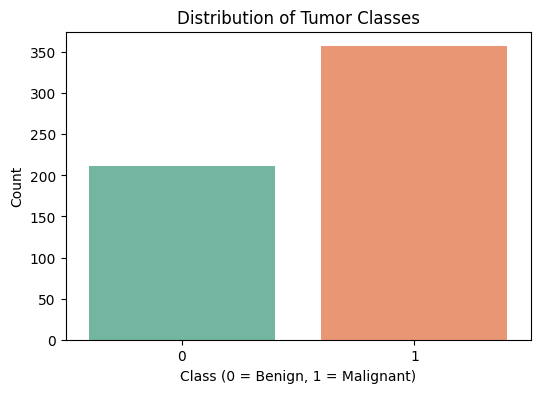

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title("Distribution of Tumor Classes")
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()

2. Feature Selection

SelectKBest for Feature Selection

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [9]:
# Save selected features
pd.DataFrame(X_test_selected, columns=selected_features).to_csv('selected_features.csv', index=False)

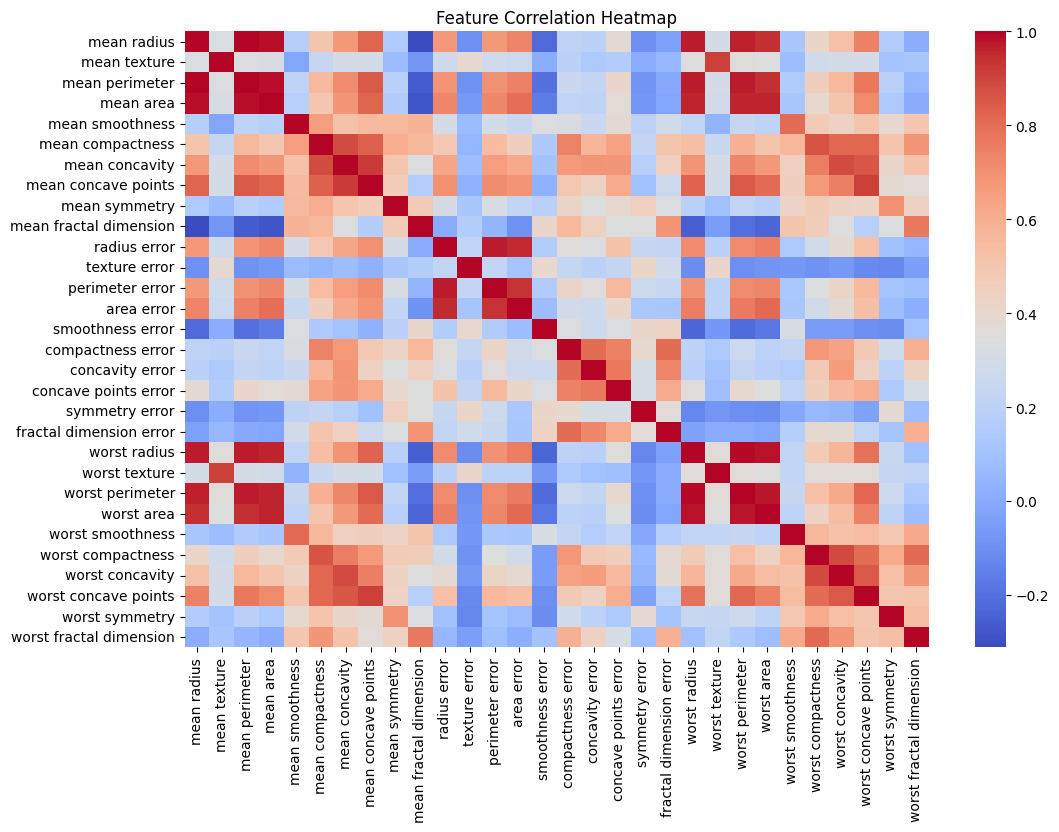

In [10]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\anand\AppData\Local\Temp\ipykernel_25688\800764335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=feature_scores[selector.get_support()], palette='viridis')


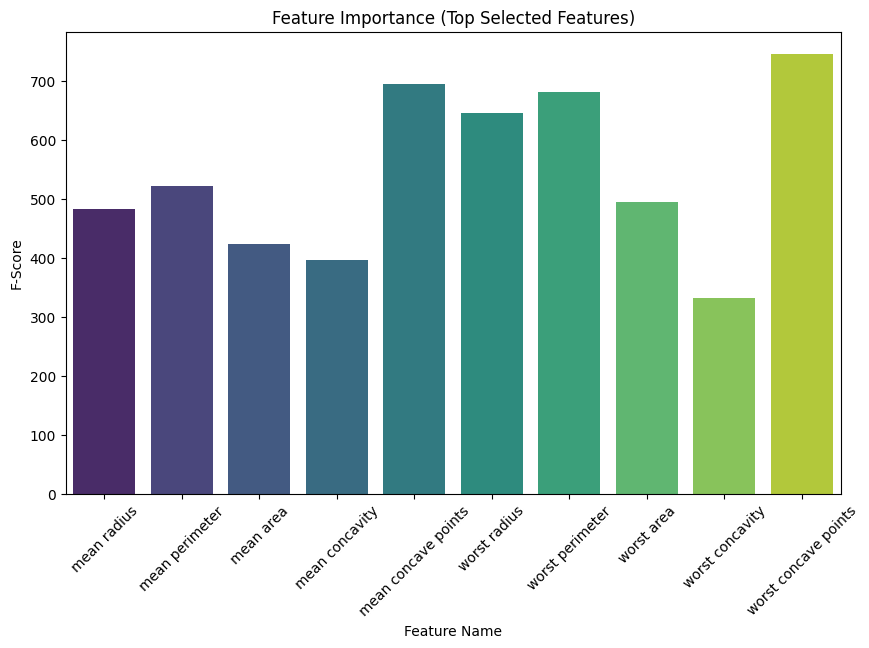

In [11]:
# Plot the scores of selected features
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=feature_scores[selector.get_support()], palette='viridis')
plt.title("Feature Importance (Top Selected Features)")
plt.xlabel("Feature Name")
plt.ylabel("F-Score")
plt.xticks(rotation=45)
plt.show()

Grid Search CV for Model Tuning

In [14]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model
model = MLPClassifier(max_iter=1000, random_state=42)


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# Grid Search
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.9582417582417582


Implementing an ANN Model

In [21]:
# Train ANN
best_model = grid_search.best_estimator_
best_model.fit(X_train_selected, y_train)

# Evaluate
accuracy = best_model.score(X_test_selected, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9736842105263158


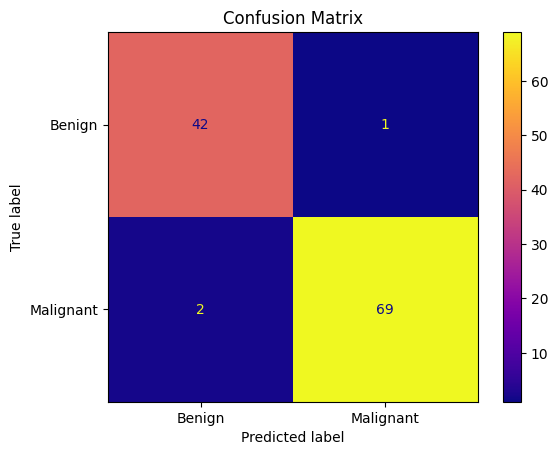

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test_selected, y_test, display_labels=["Benign", "Malignant"], cmap='plasma')
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=500)

# Set up GridSearchCV
grid_search = GridSearchCV(
    mlp, 
    param_grid, 
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}


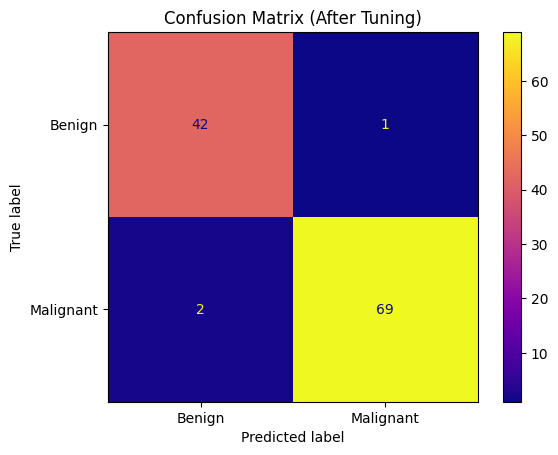

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.97        43
   Malignant       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = best_model.predict(X_test_selected)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_model, 
    X_test_selected, 
    y_test, 
    display_labels=["Benign", "Malignant"], 
    cmap='plasma'
)
plt.title("Confusion Matrix (After Tuning)")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))